# Python plotting exercise for GEOL 315 Lab 2: Geomagnetism

Lets plot the components of the Earth's magnetic field, assuming that it is perfectly described by a dipole.

Below you will find a function that defines the radial component of the Earth's magnetic field, as a function of radius, latitude and longitude.

#### 3. Execute the cells to generate contour plots of the radial azimuthal B-field. Why are the contours horizontal? Why is the magnitude of B_r negative in the southern hemisphere and positive in the northern?

#### 4. Estimate (by manipulating the graphing parameters) at what distance the magnetic field magnitude drops to 5 micro Tesla at the equator and at the magnitude North pole.

For questions 3 and 4, turn in the plots that are generated at base of the next cell along with your answers

In [4]:
#first import the plotting libraries
import numpy as np
import math
from math import pi
from numpy import cos, sin, sqrt
import matplotlib.pyplot as plt

8294.792156862744


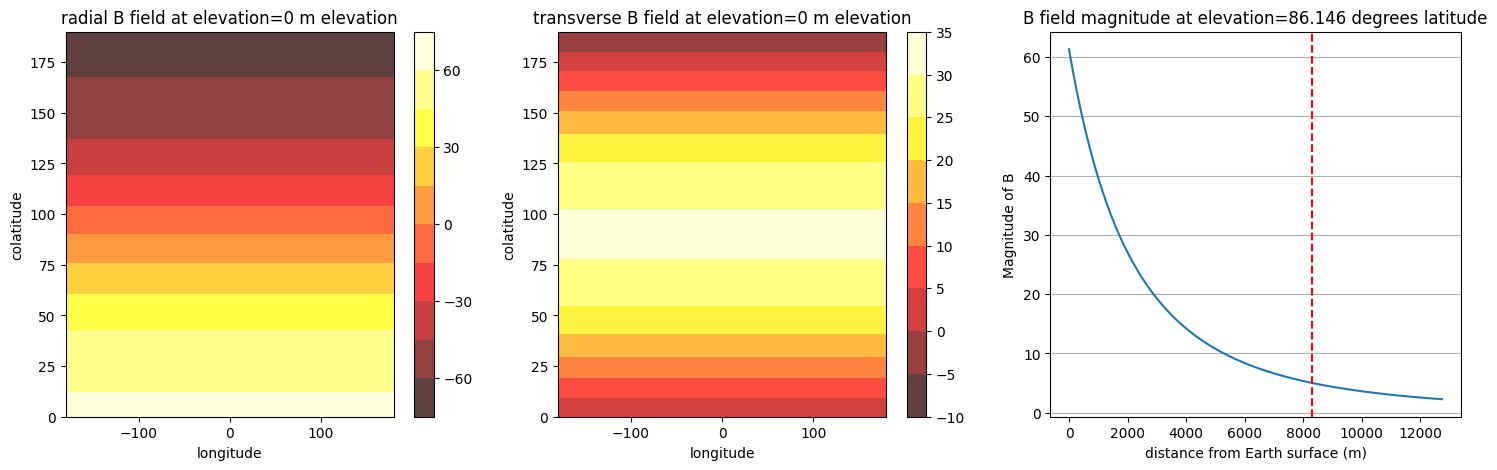

In [48]:


#define the radial and polar components of the B field in nT
#note that theta is magnetic colatitude and that positive values indicate magnetic attraction
def B_rad(rad,theta,phi,mu0,M):
    return mu0 * M * cos(theta * 2 * pi / 360) / (2 * pi * rad**3) * 10**6

def B_theta(rad,theta,phi,mu0,M):
    return mu0 * M * sin(theta * 2 * pi / 360) / (4 * pi * rad**3) * 10**6

#define the magnitude of the B field in nT
def B_mag(rad,theta,phi,mu0,M):
     return ((mu0 * M)/(4 * pi * rad**3)) * (sqrt(1 + 3 * cos(theta * 2 * pi / 360) ** 2)) * 10**6

n = 256
t = np.linspace(0,190,n) #colatitude in degrees
p = np.linspace(-180,180,n) #longitude in degrees
Theta, Phi = np.meshgrid(t,p)

M = 7.94*10**22 #dipole moment, [A m**2]
mu0 = 4*math.pi*10**-7 #magnetic permeability of free space [kg m A**-2 s**-2]

#Radius of the Earth in meters
Rearth = 6371000
radius = Rearth

r = np.linspace(Rearth, Rearth * 3, n) #radius vector in m

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

#now plot this up - notice the arguments of contourf: 1st argument is the latitude, second is longitude, third is B_rad
# the other arguments specify plotting parameters
p1 = ax[0].contourf(Phi,Theta, B_rad(radius,Theta,Phi,mu0,M), 8, alpha=.75, cmap=plt.cm.hot)
ti0 = 'radial B field at elevation=' + str(radius-radius) + ' m elevation'
ax[0].set(title=ti0,xlabel='longitude', ylabel='colatitude')

p2 = ax[1].contourf(Phi,Theta, B_theta(radius,Theta,Phi,mu0,M), 8, alpha=.75, cmap=plt.cm.hot)
ti1 = 'transverse B field at elevation=' + str(radius-radius) + ' m elevation'
ax[1].set(title=ti1,xlabel='longitude', ylabel='colatitude')

lat=86.146

#the third subplot will be the magnitude of the magnetic field as function distance from the surface
p3 = ax[2].plot((r-Rearth)/1e3, B_mag(r,lat + 90,0,mu0,M))
uT_5 = ((r-Rearth)/1e3)[np.isclose(B_mag(r, lat + 90, 0, mu0, M), 5, atol=0.05)][0]
ax[2].axvline(uT_5, c='r', linestyle="dashed")
ti2 = 'B field magnitude at elevation=' + str(lat) + ' degrees latitude'
ax[2].set(title=ti2,xlabel='distance from Earth surface (m)', ylabel='Magnitude of B')

cb=fig.colorbar(p1,ax=ax[0])
cb=fig.colorbar(p2,ax=ax[1])
ax[2].yaxis.grid()

print(uT_5)
#save the figure to your computer/repository
plt.savefig('plots/Magnetic_field_Lab2.png')

#display output
# plt.show()
# B_mag(r, lat+90, 0, mu0, M)

### 3D Representation

The plots above provide all the information we need to interrogate the Earth's magnetic field pattern. But its quite illuminating to view the vector field pattern itself. Below is a block of code that evaluates the B-field and plots a slice through the Earth from N pole to S pole (note, different from magnetic N pole!).

#### 3. By manipulating the plot parameters, generate two separate vector plots for the cases where (A) The magnetic axis aligns perfectly with the Earth's rotation axis, and (B) the pattern of field lines 1.5 million years ago (assuming zero declination)

Turn these plots in with your lab, explaining the differences between the two.

(6.125353624713423e-05, 5.953240655748196e-06)


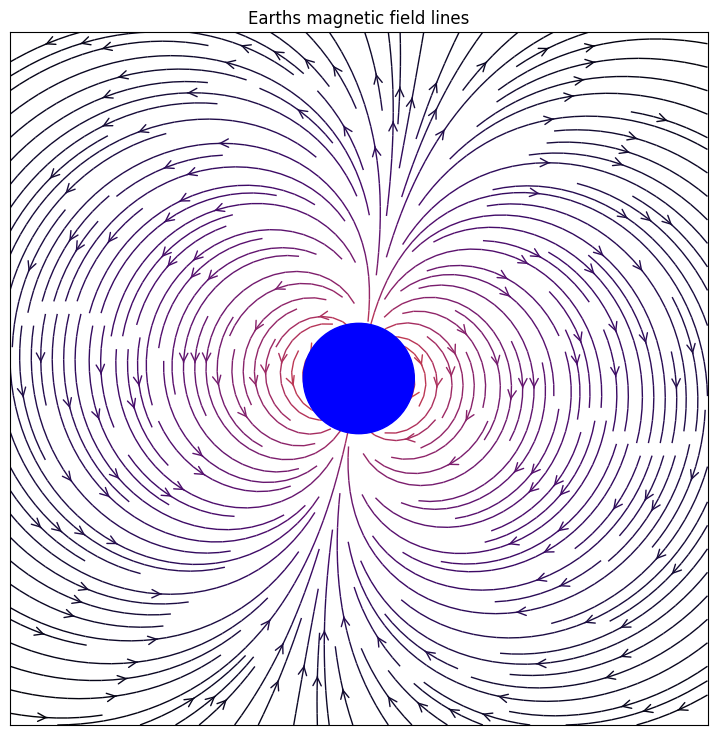

In [6]:
import sys
from matplotlib.patches import Circle

# Mean magnitude of the Earth's magnetic field at the equator in T
B0 = 3.12e-5
# Radius of Earth, Mm (10^6 m: mega-metres!)
RE = 6.370
# Deviation of magnetic pole from axis
alpha = np.radians(11)

def B(r, theta):
    """Return the magnetic field vector at (r, theta)."""
    fac = B0 * (RE / r)**3
    return -2 * fac * np.cos(theta + alpha), -fac * np.sin(theta + alpha)

# Grid of x, y points on a Cartesian grid
nx, ny = 64, 64
XMAX, YMAX = 40, 40
x = np.linspace(-XMAX, XMAX, nx)
y = np.linspace(-YMAX, YMAX, ny)
X, Y = np.meshgrid(x, y)
r, theta = np.hypot(X, Y), np.arctan2(Y, X)

print(B(RE,np.pi))
# Magnetic field vector, B = (Ex, Ey), as separate components
Br, Btheta = B(r, theta)
# Transform to Cartesian coordinates: NB make North point up, not to the right.
c, s = np.cos(np.pi/2 + theta), np.sin(np.pi/2 + theta)
Bx = -Btheta * s + Br * c
By = Btheta * c + Br * s

fig, ax = plt.subplots(1,1,figsize=(9,9))

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Bx, By))
p=ax.streamplot(x, y, Bx, By, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add a filled circle for the Earth; make sure it's on top of the streamlines.
ax.add_patch(Circle((0,0), RE, color='b', zorder=100))

ax.set_title('Earths magnetic field lines')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-XMAX, XMAX)
ax.set_ylim(-YMAX, YMAX)

plt.show()

#### Now lets evaluate the magnetic field at a specific location

#### 4. Repeat the calculation here for the magnitude of B_theta and B_mag in Eugene

#### 5. Repeat the calculation here for the location (lat/long/elevation) of Mt. Everest. How much does the B field differ in each component between Mt Everest and Eugene?

For questions 4 and 5, write down the numeric answers on your lab that you turn in.


In [ ]:
#Define r,theta,phi
Place = 'Eugene'
EugeneLat = 44.0521 #latitude
EugeneLon = -123.0868 #longitude
radius = Rearth + 430 #elevation in meters

print('The radial component of B is ' + str(B_rad(radius,EugeneLat,EugeneLon,mu0,M)) + ' microTeslas in ' + Place)
# print('The transverse component of B is ' + str(B_theta(radius,EugeneLat,EugeneLon,mu0,M)) + ' microTeslas in ' + Place)
# print('The total magnitude of B is ' + str(B_mag(radius,EugeneLat,EugeneLon,mu0,M)) + ' microTeslas in ' + Place)

The radial component of B is -44.12575318385425 microTeslas in Eugene
